In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

AdaBoost is a boosting method that uses the complete training dataset to train the weak learners. It is a sequential process, where each subsequent model tries to correct the errors of the previous model. So, the succeeding models are dependent on the previous model.

In [2]:
#read files
#Reading train file:
train = pd.read_csv('train.csv')


In [3]:
train

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
train.isnull().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
ID_train = train.ID


In [7]:
train.drop(['ID'], axis=1, inplace=True)
train

,DateTime,Junction,Vehicles
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


In [8]:
train.rename(columns={'DateTime':'ds', 'Junction': 'add1', 'Vehicles': 'y'}, inplace=True)
train

,ds,add1,y
0,2015-11-01 00:00:00,1,15
1,2015-11-01 01:00:00,1,13
2,2015-11-01 02:00:00,1,10
3,2015-11-01 03:00:00,1,7
4,2015-11-01 04:00:00,1,9
...,...,...,...
48115,2017-06-30 19:00:00,4,11
48116,2017-06-30 20:00:00,4,30
48117,2017-06-30 21:00:00,4,16
48118,2017-06-30 22:00:00,4,22


Text(0, 0.5, 'y')

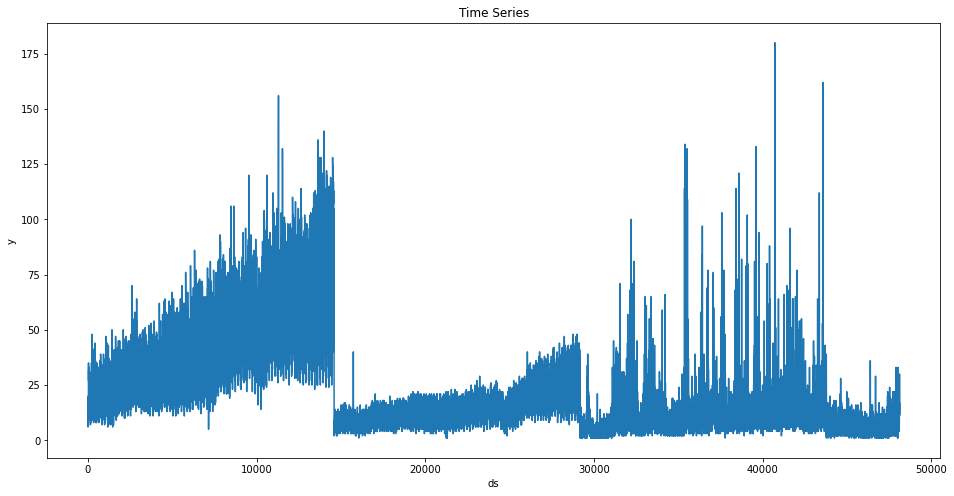

In [9]:
import matplotlib.pyplot as plt

train['y'].plot(figsize=(16, 8))
plt.title('Time Series') 
plt.xlabel("ds") 
plt.ylabel("y")

Convert ds to year, month, day, and time

In [10]:


train['year'] = train['ds'].str[:4]

train['month'] = train['ds'].str[5:7]

train['day'] = train['ds'].str[8:10]

train['time'] = train['ds'].str[11:13]
train

,ds,add1,y,year,month,day,time
0,2015-11-01 00:00:00,1,15,2015,11,01,00
1,2015-11-01 01:00:00,1,13,2015,11,01,01
2,2015-11-01 02:00:00,1,10,2015,11,01,02
3,2015-11-01 03:00:00,1,7,2015,11,01,03
4,2015-11-01 04:00:00,1,9,2015,11,01,04
...,...,...,...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,2017,06,30,19
48116,2017-06-30 20:00:00,4,30,2017,06,30,20
48117,2017-06-30 21:00:00,4,16,2017,06,30,21
48118,2017-06-30 22:00:00,4,22,2017,06,30,22


In [11]:
train.year = train.year.astype(int)
train.month = train.month.astype(int)
train.day = train.day.astype(int)
train.time = train.time.astype(int)



In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      48120 non-null  object
 1   add1    48120 non-null  int64 
 2   y       48120 non-null  int64 
 3   year    48120 non-null  int32 
 4   month   48120 non-null  int32 
 5   day     48120 non-null  int32 
 6   time    48120 non-null  int32 
dtypes: int32(4), int64(2), object(1)
memory usage: 1.8+ MB


In [13]:
y = train['y'].values
X = train.drop(['y', 'ds'], axis=1)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=1)


In [45]:
from sklearn.ensemble import GradientBoostingRegressor


In [46]:
tree=GradientBoostingRegressor(max_depth=5, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1)

In [47]:
tree=tree.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


In [48]:
y_test_pred=tree.predict(X_val)

In [50]:
df_new=(y_test_pred-y_val)/y_val
df_new=round(df_new.mean()*100,2)

In [51]:
a=100-df_new
print(a)

90.68


The n_estimators specify that boosting is terminated and A higher learning rate increases the contribution of each classifier.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

model = make_pipeline(StandardScaler(), AdaBoostRegressor(base_estimator=GradientBoostingRegressor(max_depth=5, min_samples_split=2, loss='ls',n_estimators=400, learning_rate=.1, random_state=1))).fit(X_train, y_train)
print(model.score(X_train, y_train))

In [ ]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)
print(model.score(X_val, y_val)), print(r2_score(y_pred, model.predict(X_val)))

In [ ]:
y_pred

In [ ]:
df_val=pd.DataFrame({'actual': y_val, 'predicted': y_pred})
df_val.reset_index(drop=True, inplace=True)
df_val

In [ ]:
# plot predictions and expected results
from matplotlib import pyplot

pyplot.plot(y_train)
pyplot.plot([None for i in y_train] + [x for x in y_val])
pyplot.plot([None for i in y_train] + [x for x in y_pred])
pyplot.show()